### Loading data files from Amazon S3

You can load data files from Amazon S3 storage.

#### Prerequisites

* Collect your [Amazon S3](https://aws.amazon.com/documentation/s3/) connection information: 
 * access key
 * secret key
 * bucket name 
 * file name

* Import PixieDust and enable the Spark Job monitor

In [ ]:
import pixiedust
pixiedust.enableJobMonitor()

#### Configure Amazon S3 connectivity

Customize this cell with your S3 connection information

In [ ]:
# @hidden_cell
# Enter your S3 access key (e.g. 'A....K')
s3_access_key = '...'
# Enter your S3 secret key (e.g. 'S....K')
s3_secret_key = '...'
# Enter your S3 bucket name (e.g. 'my-source-bucket')
s3_bucket = '...'
# Enter your csv file name (e.g. 'my-data/my-file.csv' if _my-file_ is located in folder _my-data_)
s3_file_name = '....csv'

#### Load CSV data

Load csv file from Amazon S3 into a Spark DataFrame. 

In [4]:
# no changes are required to this cell
from ingest import Connectors
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

S3loadoptions = { 
                  Connectors.AmazonS3.ACCESS_KEY          : s3_access_key,
                  Connectors.AmazonS3.SECRET_KEY          : s3_secret_key,
                  Connectors.AmazonS3.SOURCE_BUCKET       : s3_bucket,
                  Connectors.AmazonS3.SOURCE_FILE_NAME    : s3_file_name,
                  Connectors.AmazonS3.SOURCE_INFER_SCHEMA : '1',
                  Connectors.AmazonS3.SOURCE_FILE_FORMAT  : 'csv'}


S3_data = sqlContext.read.format('com.ibm.spark.discover').options(**S3loadoptions).load()

#### Explore the loaded data using PixieDust


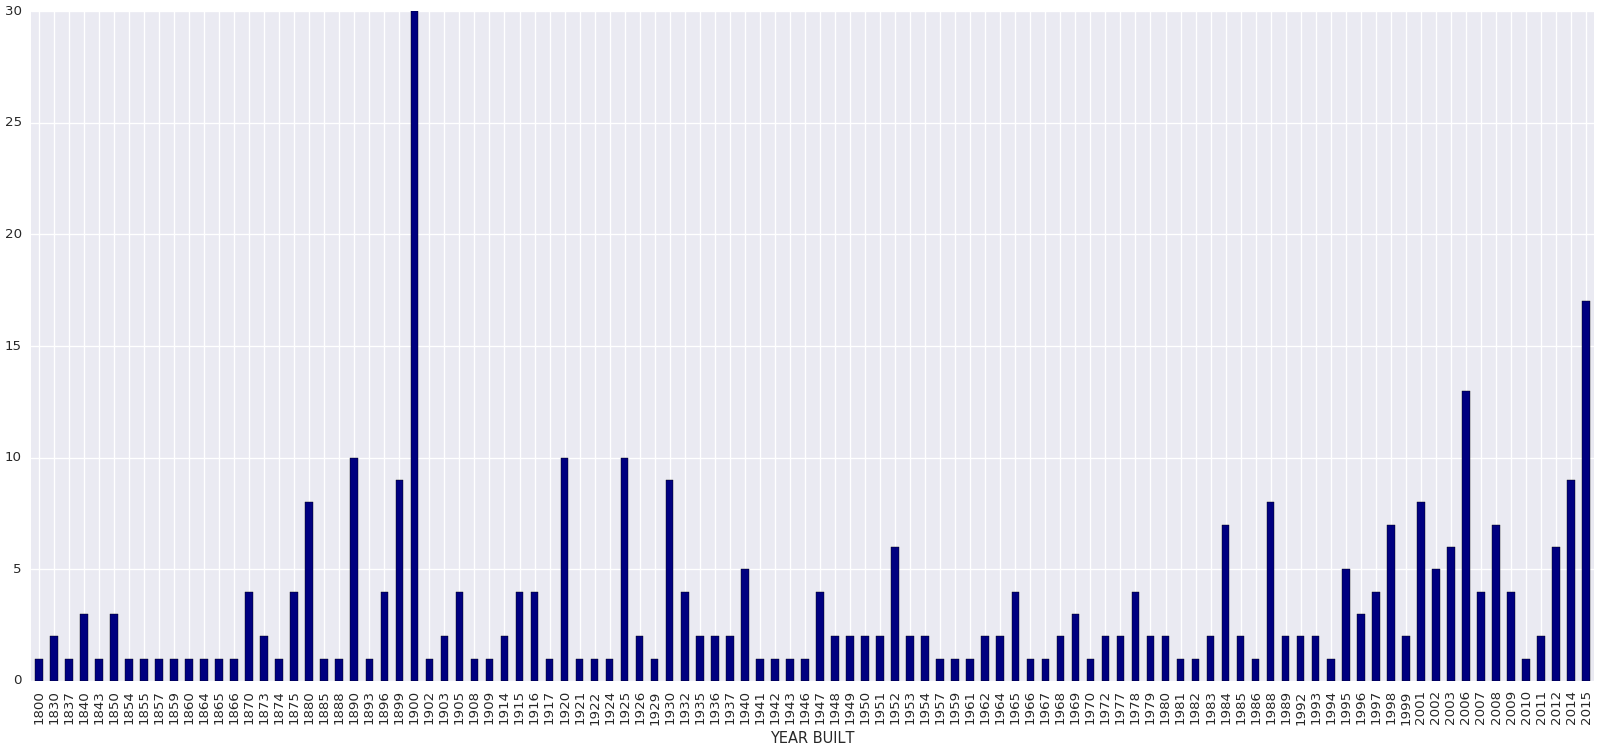

In [5]:
display(S3_data)

<div class="alert alert-block alert-info">
For information on how to load data from other sources refer to [these code snippets](https://apsportal.ibm.com/docs/content/analyze-data/python_load.html).
</div>